# Lab 4

Integrantes
- Antonia Labarca
- Felipe Urrutia

## Ejercicio 1

In [1]:
import numpy as np

In [139]:
Y1 = 1
Y2 = 2
c = 1
T = 10
p01 = 1
p02 = 1

In [131]:
A_hat = np.array([
    [0,1,1,0],
    [-1,0,0,0],
    [0,0,0,1],
    [0,0,-1,0]
])
r_hat = np.array([
    -Y2,
    Y1,
    0,
    0
])
X0 = np.array([
    Y1,
    Y2+c,
    p01,
    p02
])
A_hat @ X0

array([ 4, -1,  1, -1])

In [132]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from numpy import linalg as LA

In [133]:
def solve_pontryagin(Y1, Y2, c, T, p0=[1, 1]):
    A_hat = np.array([
        [0,1,1,0],
        [-1,0,0,0],
        [0,0,0,1],
        [0,0,-1,0]
    ])
    r_hat = np.array([
        -Y2,
        Y1,
        0,
        0
    ])
    def obj(p):
        global  Y1, Y2, c, T
        p01, p02 = p[0], p[1]
        X0 = np.array([Y1, Y2+c, p01, p02])
        sol_X = solve_ivp(lambda t, x: x@A_hat + r_hat, t_span=[0, T], y0=X0)
        p_T = sol_X.y[2:, -1]
        y1_T = sol_X.y[0, -1] 
        ref_p_T = np.array([-y1_T, 0])
        return 0.5*(p_T-ref_p_T)@(p_T-ref_p_T)

    opt_p0 = minimize(obj, x0=np.array([p0[0], p0[1]])).x
    p01, p02 = opt_p0
    print(p01, p02)
    sol_X = solve_ivp(lambda t, x: x@A_hat + r_hat, t_span=[0, T], y0=np.array([Y1, Y2+c, p01, p02]), dense_output=True)
    return sol_X.sol

In [134]:
from matplotlib import pyplot as plt

In [192]:
def plot_p1(sol, T):
    fig, ax = plt.subplots(1, 2, figsize=(5*2, 5))
    times = np.linspace(0, T, 100)
    X = [sol(t) for t in times] 
    y1 = [x[0] for x in X]
    y2 = [x[1] for x in X]
    p1 = [x[2] for x in X]
    p2 = [x[3] for x in X]
    ax[0].plot(y1, y2)
    ax[0].set_title("Solución")
    ax[0].set_xlabel("y1")
    ax[0].set_ylabel("y2")
    ax[1].plot(p1, p2);
    ax[1].set_title("Adjunto")
    ax[1].set_xlabel("p1")
    ax[1].set_ylabel("p2");
    pass

-10.835676516578232 -20.380228791632568
Wall time: 93.8 ms


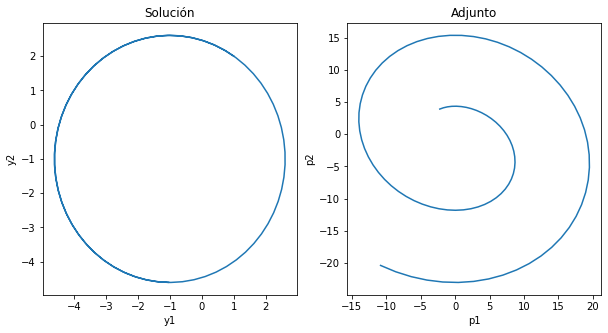

In [136]:
%%time
T=10
sol = solve_pontryagin(Y1=1, Y2=1, c=1, T=T, p0=[1, 1])
plot_p1(sol, T)

-10.229076471901891 -25.45315277535571
Wall time: 84.7 ms


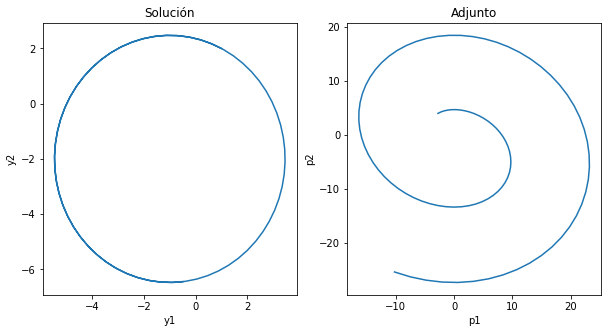

In [137]:
%%time
T=10
sol = solve_pontryagin(Y1=1, Y2=2, c=0, T=T, p0=[1, 1])
plot_p1(sol, T)

-77.33078488457629 -21.476843507963736
Wall time: 84.6 ms


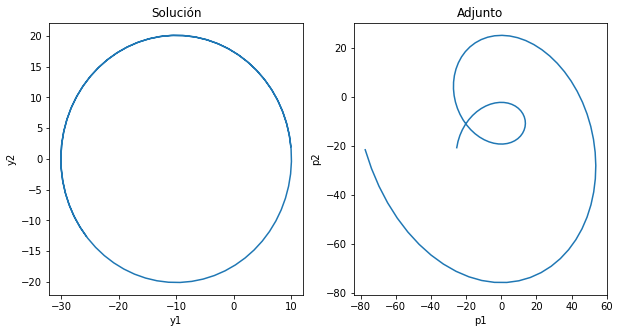

In [138]:
%%time
T=10
sol = solve_pontryagin(Y1=10, Y2=0, c=2, T=T, p0=[1, 1])
plot_p1(sol, T)

## Ejercicio 2

In [201]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from control import *

In [202]:
Y1, Y2 = [10, 10]
c=2

Q = np.array([[1, 0],
              [0, 0]])

U = np.array(1)

# W = np.array([[1, 0],
#               [0, 1]])

A = np.array([[ 0, 1],
              [-1, 0]])

B = np.array([[-1],
              [0]])

# R = np.array([-Y2, Y1])

K, S, E = lqr(A, B, Q, U)
K

array([[-1.00000000e+00, -2.41218795e-16]])

In [203]:
def fun(t, X, A, B, u):
    dx = A@X + B*u
    return dx[0]

B.T[0]*K

array([[ 1., -0.]])

In [204]:
x0 = np.array([Y1, Y2+c])

sol = scipy.integrate.solve_ivp(fun, [0,10],x0, t_eval=np.linspace(0,10, 1000), args=(A, B.T[0], K))
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 74
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.5605605

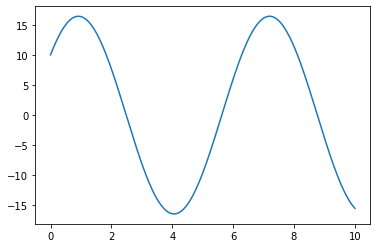

In [205]:
plt.figure()
plt.plot(sol.t, sol.y[0])
plt.show()

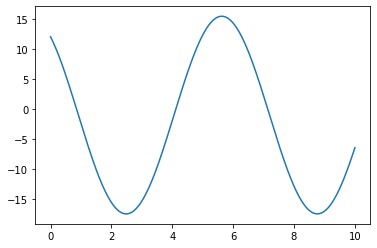

In [206]:
plt.figure()
plt.plot(sol.t, sol.y[1])
plt.show()

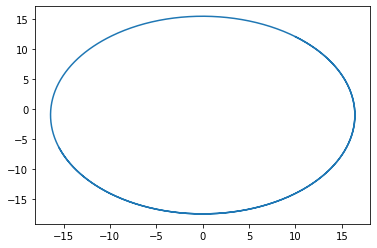

In [207]:
plt.figure()
plt.plot(sol.y[0], sol.y[1])
plt.show()

## Ejercicio 3

$$
\dot{E}(t) = W(t)-A(t)^TE(t) - E(t)^TA(t)-E(t)^TB(t)U(t)^{-1}B(t)^T E(t)
$$
$$
E(T) = -Q
$$
$$
u(t) = U(t)^{-1} B(t)^T E(t)x(t), t \in [0,T]
$$

In [179]:
A = np.array([
    [0, 1],
    [-1, 0]
])
B = np.array([
    [-1], 
    [0]
])
U = np.array([1])
Q = np.array([
    [0,1],
    [-1,0]
])
W = np.zeros((2, 2))
T = 10
def dynamic_E(t, F):
        E = np.array([
            [F[0], F[1]],
            [F[2], F[3]]
        ])
        dE = W - A.T@E - E.T@A - E.T@B@B.T@E
        return np.array([dE[0,0],dE[0,1],dE[1,0],dE[1,1]]) 
    
def obj(E0):
    global T   
    sol_E = solve_ivp(dynamic_E, t_span=[0,T], y0=E0, max_step=0.1)
    E_T = sol_E.y[:, -1]
    ref_E_T = -np.array([Q[0, 0], Q[0, 1], Q[1, 0], Q[1, 1]])
    return 0.5*(E_T-ref_E_T)@(E_T-ref_E_T)

E00=np.array([1, 1, 1, 1])
opt_E0 = minimize(obj, x0=E00).x
opt_E0
sol_E = solve_ivp(dynamic_E, t_span=[0,T], y0=opt_E0, max_step=0.1, dense_output=True)
sol_E.sol(T)

array([-1.39989270e-03, -2.92498903e-01,  2.93395323e-01, -3.04513270e-05])

In [188]:
def dynamic_ric(t, x):
    Et = sol_E.sol(t)
    Et = np.array([
        [Et[0], Et[1]],
        [Et[2], Et[3]]
    ])
    dx = A@x + B@(B.T@Et@x)
    return dx

In [190]:
x0 = np.array([
    Y1,
    Y2+c
])
sol_ric = solve_ivp(dynamic_ric, t_span=[0,T], y0=x0, max_step=0.1, dense_output=True)
sol_ric.sol(T)

array([ 0.02129221, -0.01422295])

In [199]:
def plot_p3(sol, T):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    times = np.linspace(0, T, 100)
    X = [sol(t) for t in times] 
    y1 = [x[0] for x in X]
    y2 = [x[1] for x in X]
    ax.plot(y1, y2)
    ax.set_title("Solución")
    ax.set_xlabel("y1")
    ax.set_ylabel("y2")
    pass

Wall time: 31.3 ms


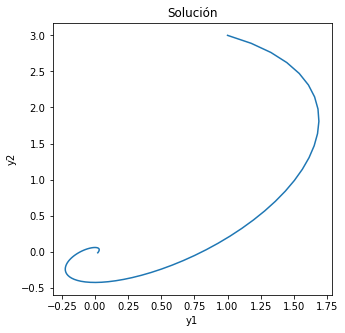

In [200]:
%%time
T=10
plot_p3(sol_ric.sol, T)

## Ejercicio 4

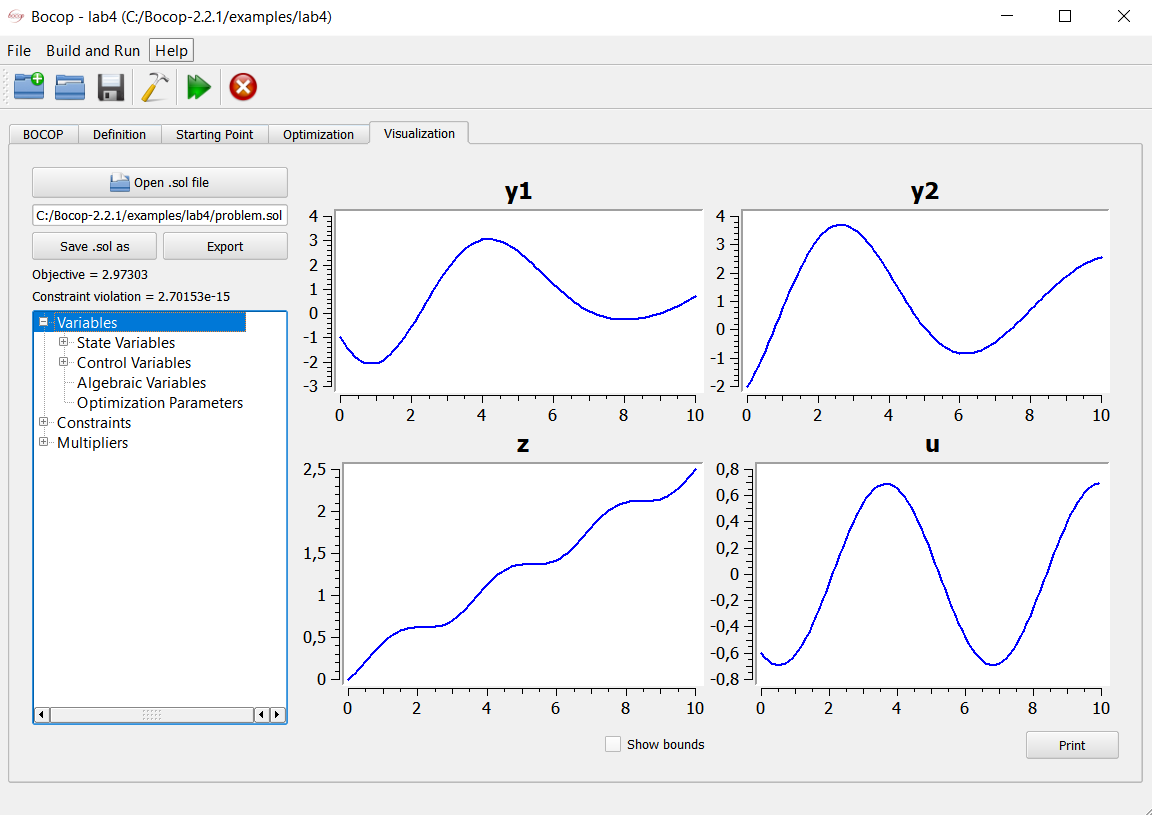
parametros: Y1=1, Y2=1, c=1

## Ejercicio 5